# Zapisywanie i wczytywanie modeli w TensorFlow

Poniższy przykład pokazuje kompletny przepływ pracy: tworzymy prosty model sieci neuronowej w TensorFlow, trenujemy go na sztucznych danych, zapisujemy na dysku, a następnie wczytujemy i wykorzystujemy do predykcji.

## Importy i przygotowanie danych
Zaczynamy od importu TensorFlow oraz przygotowania niewielkiego zbioru danych (syntetyczna regresja liniowa).

In [14]:
import tensorflow as tf
import numpy as np

# Ustawienie ziarna losowego dla powtarzalności
np.random.seed(42)
tf.random.set_seed(42)

# Dane wejściowe (x) i wyjście (y)
x = np.linspace(-1, 1, 200)
y = 3 * x + 2 + np.random.normal(0, 0.2, size=x.shape)

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)


## Definicja i kompilacja modelu
Tworzymy prosty model sekwencyjny z jedną warstwą gęstą oraz definiujemy funkcję straty i optymalizator.

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
              loss='mse',
              metrics=['mae'])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

## Trening modelu
Trenujemy model przez kilka epok, by dopasował się do danych.

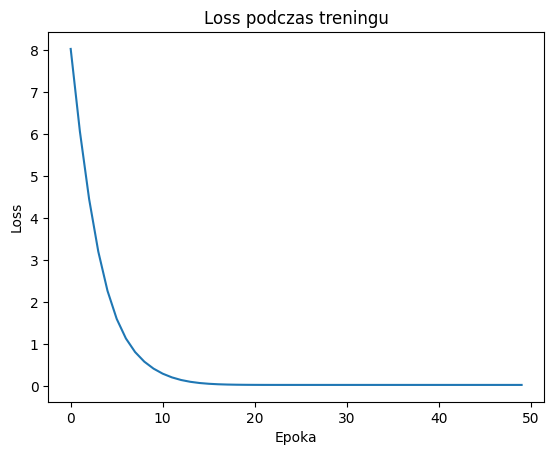

In [16]:
history = model.fit(x, y, epochs=50, verbose=0)

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Loss podczas treningu')
plt.xlabel('Epoka')
plt.ylabel('Loss')
plt.show()


## Zapis modelu

Zapisujemy model w formacie .keras

In [17]:

model_name = 'model.keras'

model.save(model_name)

print('Zapisano model do pliku', model_name)


Zapisano model do pliku model.keras


## 5. Wczytanie modelu
Wczytujemy model z dysku i wykorzystujemy go do predykcji na nowych danych.

In [18]:
loaded_model = tf.keras.models.load_model(model_name)


# Dane testowe
x_test = np.array([[-0.5], [0.0], [0.5]])
predictions = loaded_model.predict(x_test)

print('Predykcje (SavedModel):', predictions.flatten())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predykcje (SavedModel): [0.47624803 1.9888344  3.5014207 ]


## 6. Walidacja spójności
Sprawdzamy, czy parametry wczytanych modeli odpowiadają oryginalnemu modelowi.

In [19]:
# Porównujemy wagi
original_weights = model.get_weights()
loaded_weights = loaded_model.get_weights()


print('Czy wagi modelu zapisane są identyczne?', all(np.allclose(o, l) for o, l in zip(original_weights, loaded_weights)))



Czy wagi modelu zapisane są identyczne? True


## 7. Podsumowanie
1. Zbudowaliśmy i wytrenowaliśmy prosty model w TensorFlow.
2. Zapisaliśmy model.
3. Wczytaliśmy model z dysku i wykorzystaliśmy go do predykcji.
4. Porównaliśmy wagi, aby upewnić się, że wczytane modele zachowują spójność z oryginałem.

Ten schemat możesz wykorzystać w swoich projektach, zastępując model oraz dane własnymi zasobami.